# IMDB Review Analysis




## Importing libraries


In [ ]:
import nltk 
import pandas as pd
import string
import collections
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from matplotlib import pyplot as plt
from nltk.corpus import stopwords
from collections import Counter
import itertools

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer, PorterStemmer


In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

## Importing dataset through the link

In [ ]:
url = "https://raw.githubusercontent.com/shivvignesh/IMDb-reviews-Sentiment-Analysis/master/dataset.csv"

data = pd.read_csv(url, encoding="ISO-8859-1")
data.head()

SentimentText  Sentiment
0  first think another Disney movie, might good, ...          1
1  Put aside Dr. House repeat missed, Desperate H...          0
2  big fan Stephen King's work, film made even gr...          1
3  watched horrid thing TV. Needless say one movi...          0
4  truly enjoyed film. acting terrific plot. Jeff...          1

## Cleaning text data by lowering cases, removing puctuation and tokenization

In [ ]:
translator = str.maketrans('', '', string.punctuation)

data['SentimentText'] = data['SentimentText'].apply(
    lambda x: nltk.word_tokenize(x.lower().strip().translate(translator)))

## Removing Stopwords in English

In [ ]:
tokens_without_stpw = [token for token in data['SentimentText'] if token not in stopwords.words('english')] 

tokens_without_stpw

[['first',
  'think',
  'another',
  'disney',
  'movie',
  'might',
  'good',
  'its',
  'kids',
  'movie',
  'watch',
  'it',
  'cant',
  'help',
  'enjoy',
  'it',
  'ages',
  'love',
  'movie',
  'first',
  'saw',
  'movie',
  '10',
  '8',
  'years',
  'later',
  'still',
  'love',
  'it',
  'danny',
  'glover',
  'superb',
  'could',
  'play',
  'part',
  'better',
  'christopher',
  'lloyd',
  'hilarious',
  'perfect',
  'part',
  'tony',
  'danza',
  'believable',
  'mel',
  'clark',
  'cant',
  'help',
  'enjoy',
  'movie',
  'give',
  '1010'],
 ['put',
  'aside',
  'dr',
  'house',
  'repeat',
  'missed',
  'desperate',
  'housewives',
  'new',
  'watch',
  'one',
  'dont',
  'know',
  'exactly',
  'plagued',
  'movie',
  'never',
  'thought',
  'id',
  'say',
  'this',
  'want',
  '15',
  'minutes',
  'fame',
  'backbr',
  'br',
  'script',
  'direction',
  'cant',
  'say',
  'recognized',
  'stable',
  'actors',
  'the',
  'usual',
  'suspects',
  'thought',
  'herbert',
  '

## Creating a Wordcloud

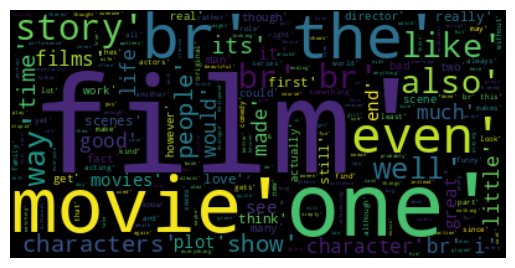

In [ ]:

# Convert data to a string
text = ' '.join(map(str, data['SentimentText'].tolist()))

# Generate word cloud
wordcloud = WordCloud().generate(text)

# Display the generated image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Ploting a Histogram of Frequent Tokens

<Axes: xlabel='word'>

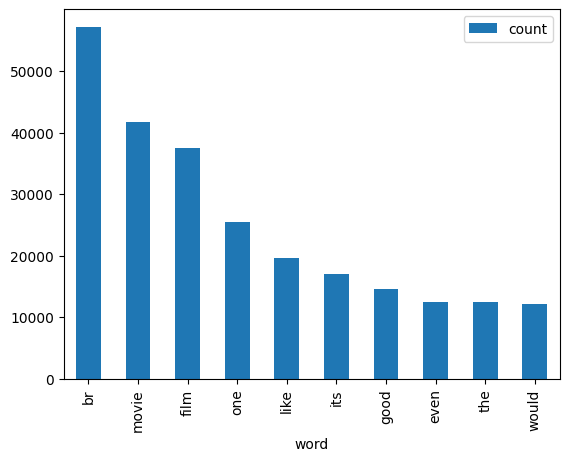

In [ ]:
# Flatten tokens_without_stpw
flattened_tokens = list(itertools.chain.from_iterable(tokens_without_stpw))

# Create DataFrame of most common words
pd.DataFrame(Counter(flattened_tokens).most_common(10), columns=["word", "count"]).set_index("word").plot(kind="bar")

## Vectorization by using CountVectorizer

In [ ]:
cv = CountVectorizer()
cv_matrix = cv.fit_transform(flattened_tokens)


### Putting Vector Matrix on an Array

Since the data set is large, this can kill the kernel!!!

In [ ]:
X = cv_matrix.toarray()
X

### Feature Extraction

In [ ]:
features = cv.get_feature_names_out()

In [ ]:
features

array(['00', '000', '0000000000001', ..., 'ã¼berannoying', 'ã¼berspy',
       'ãã'], dtype=object)

## N-grams



In [ ]:
corpus = [
    data['SentimentText'][0],
    data['SentimentText'][2],
    data['SentimentText'][1955]
]

# Cast each element in the corpus list to a string
corpus = [str(elem) for elem in corpus]

# Concatenate the elements of the corpus list into a single string
corpus_str = ' '.join(corpus)

bigrams = CountVectorizer(ngram_range=(2,2))
result = bigrams.fit_transform([corpus_str])

# Alternatively, if you want to get the bigram counts for each element in the corpus list separately, you can pass the corpus list directly to the `fit_transform()` method:
result = bigrams.fit_transform(corpus)
bigrams.get_feature_names_out()

array(['10 10', '10 years', '2001and really', 'absolutely beautiful',
       'absolutely nothing', 'absolutely riveting', 'acting first',
       'acting pet', 'ages love', 'almost perfect', 'although film',
       'ambient musical', 'andy goldsworthywho', 'another disney',
       'anymore dont', 'anything second', 'appears movie',
       'around worldas', 'art using', 'artas well', 'artist andy',
       'available dvd', 'away disappointed', 'away main', 'away years',
       'back 2001and', 'back fact', 'back life', 'back person',
       'basic reasons', 'beautiful pieces', 'before rachel',
       'behind house', 'behind pet', 'believable mel',
       'better christopher', 'big fan', 'birth sheep', 'bit work',
       'bottom linenone', 'bugged several', 'burial ground', 'bury human',
       'cant help', 'capable ensemble', 'cemetery behind',
       'cemetery burial', 'character film', 'character pops',
       'character zelda', 'chills back', 'christopher lloyd',
       'cinema highligh

## Lemantization and Semantization

In [ ]:
# Initialize lemmatizer and stemmer
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

# Define a function to lemmatize and stem a comment
def lemmatize_and_stem(comment):
    # Tokenize the comment into words
    words = nltk.word_tokenize(comment.lower())
    
    # Lemmatize and stem each word
    words = [lemmatizer.lemmatize(word) for word in words]
    words = [stemmer.stem(word) for word in words]
    
    # Join the words back into a string
    comment = ' '.join(words)
    return comment

# Apply the lemmatize_and_stem function to the 'comments' column of the DataFrame
data['comments_lemstem'] = data['SentimentText'].apply(lemmatize_and_stem)

In [ ]:
data.head()

SentimentText  Sentiment  \
0  first think another Disney movie, might good, ...          1   
1  Put aside Dr. House repeat missed, Desperate H...          0   
2  big fan Stephen King's work, film made even gr...          1   
3  watched horrid thing TV. Needless say one movi...          0   
4  truly enjoyed film. acting terrific plot. Jeff...          1   

                                    comments_lemstem  
0  first think anoth disney movi , might good , i...  
1  put asid dr. hous repeat miss , desper housewi...  
2  big fan stephen king 's work , film made even ...  
3  watch horrid thing tv . needl say one movi wat...  
4  truli enjoy film . act terrif plot . jeff comb...

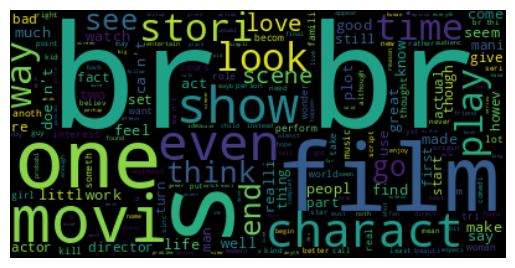

In [ ]:
# Convert data to a string
text_lem = ' '.join(map(str, data['comments_lemstem'].tolist()))

# Generate word cloud
wordcloud = WordCloud().generate(text_lem)

# Display the generated image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()